In [30]:
import ROOT

In [2]:
chainmc = ROOT.TChain("dihadron")
chainmc.Add("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/ML/projects/pipluspi0_prelim/catboost/postprocess/MC_3051*")

5

In [3]:
chaindata = ROOT.TChain("dihadron")
chaindata.Add("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/ML/projects/pipluspi0_prelim/catboost/postprocess/nSidis_50*")

13

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


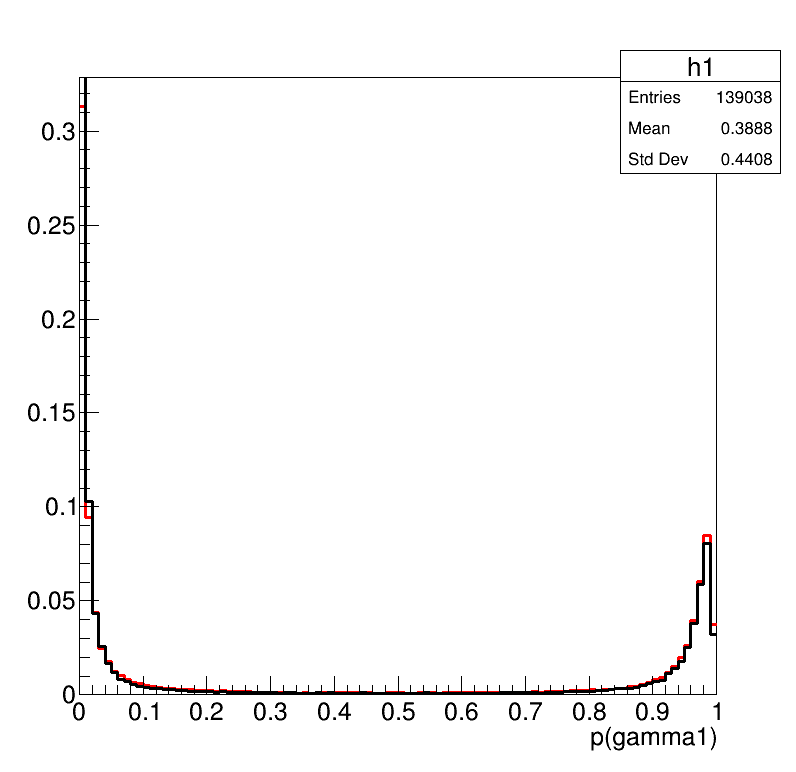

In [27]:
c=ROOT.TCanvas("c","c",800,800)
h1 = ROOT.TH1F("h1",";p(gamma1);",100,0,1)
h2 = ROOT.TH1F("h2",";p(gamma1);",100,0,1)

chainmc.Draw("prob_g1>>h1","z>0.8 && z<1","hist")
chaindata.Draw("prob_g1>>h2","z>0.8 && z<1","hist same")

h1.SetLineColor(2)
h2.SetLineColor(1)

h1.Scale(1/h1.Integral())
h2.Scale(1/h2.Integral())

h1.SetLineWidth(3)
h2.SetLineWidth(3)

c.Draw()

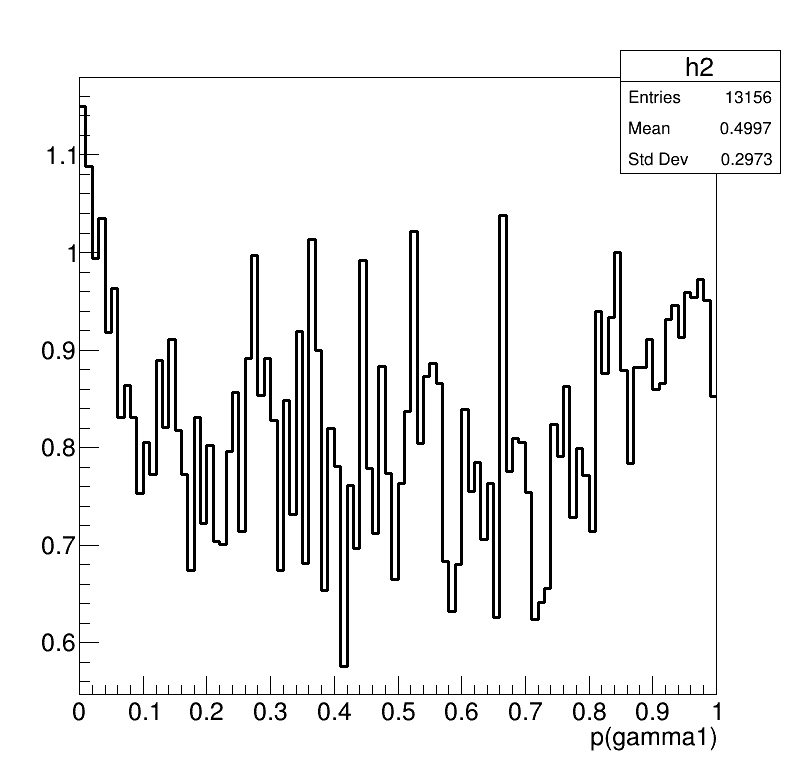

In [28]:
h2.Divide(h1)
h2.Draw("hist")
c.Draw()

---

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


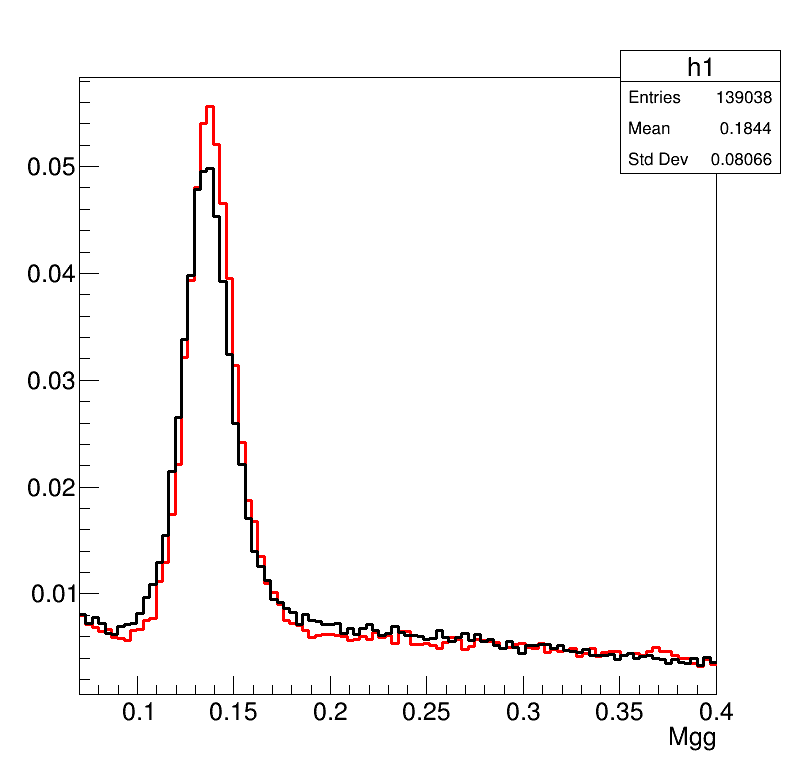

In [5]:
c=ROOT.TCanvas("c","c",800,800)
h1 = ROOT.TH1F("h1",";Mgg;",100,0.07,0.4)
h2 = ROOT.TH1F("h2",";Mgg;",100,0.07,0.4)

chainmc.Draw("Mgg>>h1","z>0.8 && z<1","hist")
chaindata.Draw("Mgg>>h2","z>0.8 && z<1","hist same")

h1.SetLineColor(2)
h2.SetLineColor(1)

h1.Scale(1/h1.Integral())
h2.Scale(1/h2.Integral())

h1.SetLineWidth(3)
h2.SetLineWidth(3)

c.Draw()

# z binning before ML cuts

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


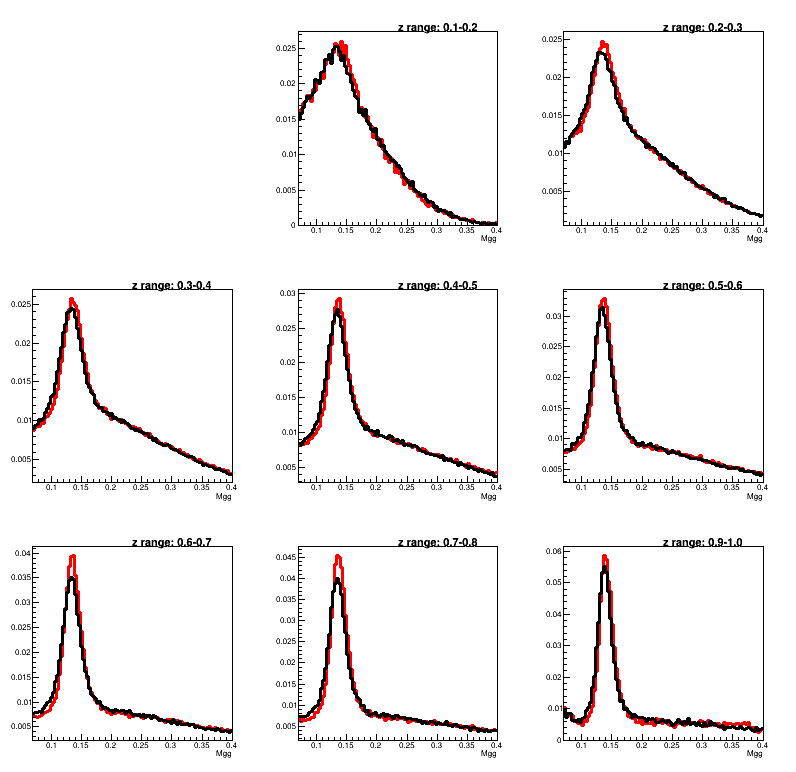

In [17]:
import numpy as np
c=ROOT.TCanvas("c","c",800,800)
c.Divide(3,3)
h1arr=[]
h2arr=[]
for i in range(1,10):
    c.cd(i+1)
    z_start = np.round(i * 0.1,1)
    z_end = np.round((i+1) * 0.1,1)
    h1arr.append(ROOT.TH1F("h1_%s_%s" % (z_start, z_end),";Mgg;",100,0.07,0.4))
    h2arr.append(ROOT.TH1F("h2_%s_%s" % (z_start, z_end),";Mgg;",100,0.07,0.4))
    chainmc.Draw("Mgg>>h1_%s_%s" % (z_start, z_end),"z>%s && z<%s" % (z_start, z_end),"hist")
    chaindata.Draw("Mgg>>h2_%s_%s" % (z_start, z_end),"z>%s && z<%s" % (z_start, z_end),"hist same")

    h1=h1arr[-1]
    h2=h2arr[-1]
    h1.SetLineColor(2)
    h2.SetLineColor(1)
    if(h1.Integral()==0 or h2.Integral()==0):
        continue
    h1.Scale(1/h1.Integral())
    h2.Scale(1/h2.Integral())
    h1.SetLineWidth(3)
    h2.SetLineWidth(3)

    latex = ROOT.TLatex()
    latex.DrawLatexNDC(0.5, 0.9, "z range: %s-%s" % (z_start, z_end))
    ROOT.gStyle.SetOptStat(0)
c.Draw()

# z binned after ML cuts

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


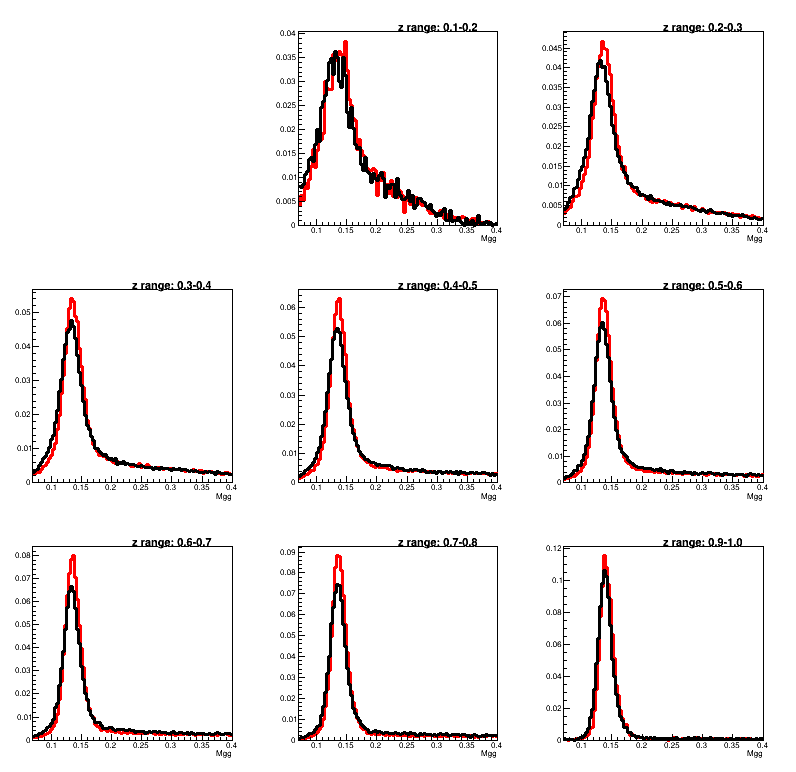

In [22]:
import numpy as np
c=ROOT.TCanvas("c","c",800,800)
c.Divide(3,3)
h1arr=[]
h2arr=[]
for i in range(1,10):
    c.cd(i+1)
    z_start = np.round(i * 0.1,1)
    z_end = np.round((i+1) * 0.1,1)
    h1arr.append(ROOT.TH1F("h1_%s_%s" % (z_start, z_end),";Mgg;",100,0.07,0.4))
    h2arr.append(ROOT.TH1F("h2_%s_%s" % (z_start, z_end),";Mgg;",100,0.07,0.4))
    chainmc.Draw("Mgg>>h1_%s_%s" % (z_start, z_end),"prob_g1>0.9&&prob_g2>0.9&&z>%s && z<%s" % (z_start, z_end),"hist")
    
    chaindata.Draw("Mgg>>h2_%s_%s" % (z_start, z_end),"prob_g1>0.9&&prob_g2>0.9&&z>%s && z<%s" % (z_start, z_end),"hist same")

    h1=h1arr[-1]
    h2=h2arr[-1]
    h1.SetLineColor(2)
    h2.SetLineColor(1)
    if(h1.Integral()==0 or h2.Integral()==0):
        continue
    h1.Scale(1/h1.Integral())
    h2.Scale(1/h2.Integral())
    h1.SetLineWidth(3)
    h2.SetLineWidth(3)

    latex = ROOT.TLatex()
    latex.DrawLatexNDC(0.5, 0.9, "z range: %s-%s" % (z_start, z_end))
    ROOT.gStyle.SetOptStat(0)
c.Draw()

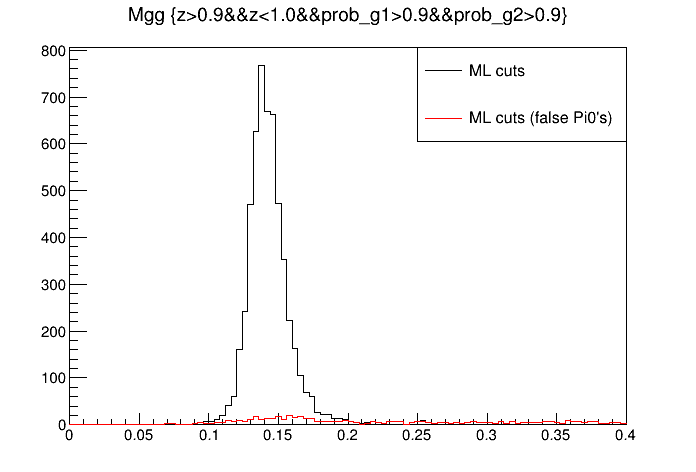

In [34]:
c=ROOT.TCanvas()
chainmc.Draw("Mgg>>h1(100,0,0.4)","z>0.9&&z<1.0&&prob_g1>0.9&&prob_g2>0.9","")
chainmc.Draw("Mgg>>h2(100,0,0.4)","z>0.9&&z<1.0&&prob_g1>0.9&&prob_g2>0.9&&truePi0==0","same")


h1 = c.GetPrimitive("h1")
h2 = c.GetPrimitive("h2")
h1.SetLineColor(ROOT.kBlack)
h2.SetLineColor(ROOT.kRed)

tleg = ROOT.TLegend(0.6,0.7,0.9,0.9)
tleg.AddEntry(h1,"ML cuts","l")
tleg.AddEntry(h2,"ML cuts (false Pi0's)","l")
tleg.Draw()

c.Draw()

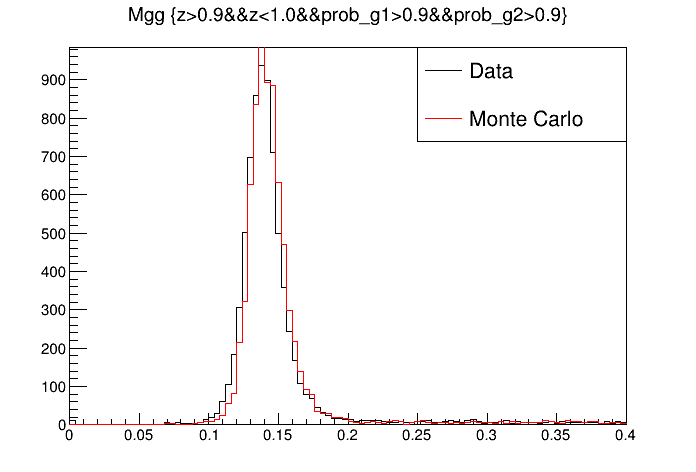

In [37]:
c=ROOT.TCanvas()
chaindata.Draw("Mgg>>h1(100,0,0.4)","z>0.9&&z<1.0&&prob_g1>0.9&&prob_g2>0.9","hist ")
chainmc.Draw("Mgg>>h2(100,0,0.4)","z>0.9&&z<1.0&&prob_g1>0.9&&prob_g2>0.9","hist same")



h1 = c.GetPrimitive("h1")
h2 = c.GetPrimitive("h2")
h1.SetLineColor(ROOT.kBlack)
h2.SetLineColor(ROOT.kRed)
h2.Scale(h1.Integral()/h2.Integral())
tleg = ROOT.TLegend(0.6,0.7,0.9,0.9)
tleg.AddEntry(h1,"Data","l")
tleg.AddEntry(h2,"Monte Carlo","l")
tleg.Draw()

c.Draw()